<a href="https://colab.research.google.com/github/akashtepan/NYC-Taxi-Trip-Time-Prediction/blob/main/Shubham_Tepan_Notebook_NYC__Taxi__Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **NYC Taxi Trip Time Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Shubham Tepan (Individual)

# **GitHub Link -**

# <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

# <b> Data Description </b>

### This project uses a dataset based on the 2016 NYC Yellow Cab trip record data that was made available in Big Query on Google Cloud Platform. The original data was published by the NYC Taxi and Limousine Commission (TLC), but it has been sampled and cleaned for this project. The goal of the project is to predict the duration of each trip in the test set using various trip attributes as predictors.

## Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Importing Libraries and Dataset**

In [ ]:
# Importing the necessary libraries
import numpy as np        # for numerical computing
import pandas as pd       # for data manipulation and analysis
import seaborn as sns     # for data visualization
import matplotlib.pyplot as plt     # for data visualization
import warnings          # to ignore any warning messages
warnings.simplefilter('ignore')
import datetime as dt    # for date and time calculations

In [ ]:
# Import the drive module from the google.colab library
from google.colab import drive

# Mount the drive onto the '/content/drive' directory
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset file
df = pd.read_csv("/content/drive/MyDrive/data project/Copy of NYC Taxi Data.csv")

# **The EDA process starts with the following steps -**

In [ ]:
# Displaying the first 5 rows of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Finding the number of rows and columns in the dataset
rows, columns = df.shape

# Printing the number of rows and columns in the dataset
print('The dataset has', rows, 'rows and', columns, 'columns.')

The dataset has 1458644 rows and 11 columns.


In [ ]:
# Storing the column names of the dataset in a variable
columns = df.columns

# Printing the column names
print('Column Names:')
print(columns)

Column Names:
Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [ ]:
# Generate summary statistics for the dataset
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


## **Cleaning Dataset**

In [ ]:
# Missing values
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

# Missing value percentage 
print(missing_percentage(df))

                    Total  Percent
id                      0      0.0
vendor_id               0      0.0
pickup_datetime         0      0.0
dropoff_datetime        0      0.0
passenger_count         0      0.0
pickup_longitude        0      0.0
pickup_latitude         0      0.0
dropoff_longitude       0      0.0
dropoff_latitude        0      0.0
store_and_fwd_flag      0      0.0
trip_duration           0      0.0


### The dataset used in this project has already been cleaned, so no further cleaning is required before analysis or modeling.

## **Exploring the unique values of each attribute**

In [ ]:
# Iterate over all columns in the dataset and print the number of unique values in each column
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in id - 1458644
Total Unique Values in vendor_id - 2
Total Unique Values in pickup_datetime - 1380222
Total Unique Values in dropoff_datetime - 1380377
Total Unique Values in passenger_count - 10
Total Unique Values in pickup_longitude - 23047
Total Unique Values in pickup_latitude - 45245
Total Unique Values in dropoff_longitude - 33821
Total Unique Values in dropoff_latitude - 62519
Total Unique Values in store_and_fwd_flag - 2
Total Unique Values in trip_duration - 7417


### Converting Timestamps to Datetime Format in a Dataset.

In [ ]:
# Convert 'pickup_datetime' and 'dropoff_datetime' to pandas datetime objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Check the updated dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Extract various date and time components from pickup_datetime and dropoff_datetime columns
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['pickup_weekday'] = df.pickup_datetime.dt.day_name()
df['pickup_month'] = df.pickup_datetime.dt.month
df['pickup_day_num'] = df.pickup_datetime.dt.weekday

df['dropoff_weekday'] = df.dropoff_datetime.dt.day_name()

The code extracts various date and time components from the "pickup_datetime" and "dropoff_datetime" columns using the "dt" accessor in pandas and creates new columns in the "df" dataframe for pickup hour, pickup weekday, pickup month, pickup day number, and dropoff weekday. These new columns provide additional information about the temporal patterns in the taxi ride data, which can be useful for further analysis and modeling.

In [ ]:
# Install and import the 'haversine' library for distance calculation
!pip install haversine
from haversine import haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **NOTE**
The "haversine" library is used to calculate the distance between two points on the Earth's surface, based on their latitude and longitude coordinates, while accounting for the curvature of the Earth's surface. 

In [ ]:
# Define a function to calculate the haversine distance
def distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup, dropoff)

# Apply the function to the dataframe to create a new column
df['distance_km'] = df.apply(distance, axis=1)

In [ ]:
# Calculate the speed in km/hr and store the result in a new 'speed' column
df['speed'] = (
    # Distance in km
    df.distance_km / 
    # Time in seconds, converted to hours
    (df.trip_duration / 3600))

In [ ]:
#Slot creation of time in days
def time_of_day(X):
  # Check if the input is in the range of 6 to 12 (exclusive)
  if X in range(6,12):
    return "Morning time"
  # Check if the input is in the range of 12 to 16 (exclusive)
  elif X in range(12,16):
    return "Afternoon time"
  # Check if the input is in the range of 16 to 22 (exclusive)
  elif X in range(16, 22):
    return "Evening time"
  # If the input is not in any of the above ranges, it must be between 22 and 6 (inclusive)
  else:
    return "Late night time"

In [ ]:
# Apply the function to the 'pickup_hour' column and add the result as a new column 'pickuptime_of_day'
df['pickuptime_of_day'] = df['pickup_hour'].apply(time_of_day)

# Print the updated DataFrame to check the new column
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_month,pickup_day_num,dropoff_weekday,distance_km,speed,pickuptime_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,Monday,3,0,Monday,1.498523,11.856445,Evening time
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,Sunday,6,6,Sunday,1.805510,9.803672,Late night time
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,Tuesday,1,1,Tuesday,6.385107,10.822216,Morning time
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,Wednesday,4,2,Wednesday,1.485500,12.465738,Evening time
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,Saturday,3,5,Saturday,1.188590,9.836608,Afternoon time


In [ ]:
# Get the data types of each column
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


## **Location Map**

In [ ]:
# Import the Folium library for visualizing geospatial data
import folium

# Import the FastMarkerCluster and HeatMap plugins for Folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [ ]:
# Group the rows of the DataFrame by their pickup location, using pickup_latitude and pickup_longitude columns
pick_loc = df.groupby(['pickup_latitude','pickup_longitude'])['id'].count().reset_index().rename(columns={'id':'Number_of_times'})
pick_loc.head()

,pickup_latitude,pickup_longitude,Number_of_times
0,34.359695,-65.848389,1
1,34.712234,-75.354332,1
2,35.081532,-71.799896,1
3,35.310307,-72.074333,1
4,36.029301,-77.440750,1


In [ ]:
# Group the rows of the DataFrame by the 'dropoff_latitude' and 'dropoff_longitude' columns
drop_loc = df.groupby(['dropoff_latitude','dropoff_longitude'])['id'].count().reset_index().rename(columns={'id':'Number_of_times'})
drop_loc.head()

,dropoff_latitude,dropoff_longitude,Number_of_times
0,32.181141,-73.834923,1
1,34.359695,-65.848389,1
2,35.173546,-72.022408,1
3,36.029301,-77.440750,1
4,36.118538,-68.778435,1


In [ ]:
# For the pickup location DataFrame:
# - Create a new column 'pickup_lat_rd3' that rounds the 'pickup_latitude' column to 3 decimal places
# - Create a new column 'pickup_lon_rd3' that rounds the 'pickup_longitude' column to 3 decimal places
pick_loc['pickup_lat_rd3'] = round(pick_loc['pickup_latitude'], 3)
pick_loc['pickup_lon_rd3'] = round(pick_loc['pickup_longitude'], 3)

# For the dropoff location DataFrame:
# - Create a new column 'dropoff_lat_rd3' that rounds the 'dropoff_latitude' column to 3 decimal places
# - Create a new column 'dropoff_lon_rd3' that rounds the 'dropoff_longitude' column to 3 decimal places
drop_loc['dropoff_lat_rd3'] = round(drop_loc['dropoff_latitude'], 3)
drop_loc['dropoff_lon_rd3'] = round(drop_loc['dropoff_longitude'], 3)

In [ ]:
# Group rows by rounded-off pickup latitude and longitude, and count the number of times each combination appears
pick_loc1 = pick_loc.groupby(['pickup_lat_rd3','pickup_lon_rd3'])['Number_of_times'].count().reset_index()

# Rename column for clarity
pick_loc1 = pick_loc1.rename(columns={'Number_of_times': 'Number_of_times'})

# Show first few rows of resulting DataFrame
pick_loc1.head()

,pickup_lat_rd3,pickup_lon_rd3,Number_of_times
0,34.360,-65.848,1
1,34.712,-75.354,1
2,35.082,-71.800,1
3,35.310,-72.074,1
4,36.029,-77.441,1


In [ ]:
# Group rows by rounded-off dropoff latitude and longitude, and count the number of times each combination appears
drop_loc1 = drop_loc.groupby(['dropoff_lat_rd3','dropoff_lon_rd3'])['Number_of_times'].count().reset_index()

# Rename column for clarity
drop_loc1 = drop_loc1.rename(columns={'Number_of_times': 'Number_of_times'})

# Show first few rows of resulting DataFrame
drop_loc1.head()

,dropoff_lat_rd3,dropoff_lon_rd3,Number_of_times
0,32.181,-73.835,1
1,34.360,-65.848,1
2,35.174,-72.022,1
3,36.029,-77.441,1
4,36.119,-68.778,1


In [ ]:
# Set location of New York City using latitude and longitude coordinates
location = [40.730610, -73.935242]

# Combine pickup latitude, longitude, and count values into a list
pick = list(zip(pick_loc1.pickup_lat_rd3.values,
                pick_loc1.pickup_lon_rd3.values,
                pick_loc1.Number_of_times.values.astype(float)))

# Combine dropoff latitude, longitude, and count values into a list
drop = list(zip(drop_loc1.dropoff_lat_rd3.values,
                drop_loc1.dropoff_lon_rd3.values,
                drop_loc1.Number_of_times.values.astype(float)))

In [ ]:
# Creating array for pickup co-ordinates
pick_loc1.values

array([[ 34.36 , -65.848,   1.   ],
       [ 34.712, -75.354,   1.   ],
       [ 35.082, -71.8  ,   1.   ],
       ...,
       [ 43.912, -71.882,   1.   ],
       [ 44.372, -66.972,   1.   ],
       [ 51.881, -72.81 ,   1.   ]])

In [ ]:
# Creating array for dropoff co-ordinates
drop_loc1.values

array([[ 32.181, -73.835,   1.   ],
       [ 34.36 , -65.848,   1.   ],
       [ 35.174, -72.022,   1.   ],
       ...,
       [ 43.674, -79.554,   1.   ],
       [ 43.912, -71.882,   1.   ],
       [ 43.921, -79.519,   1.   ]])

In [ ]:
# Create a folium map centered on New York City with a default zoom level of 9
pickup_map = folium.Map(location=location, zoom_start=9)

# Create a heatmap layer based on the pickup location data
heatmap = HeatMap(pick_loc1,
                  min_opacity=0.3,
                  radius=9,
                  blur=10,
                  max_zoom=1)

# Add the heatmap layer to the map
pickup_map.add_child(heatmap)

# Display the map
pickup_map

In [ ]:
# Create a folium map centered on New York City with a default zoom level of 9
dropoff_map = folium.Map(location=location, zoom_start=9)

# Create a heatmap layer based on the dropoff location data
heatmap1 = HeatMap(drop_loc1,
                   min_opacity=0.3,
                   radius=9,
                   blur=10,
                   max_zoom=1)

# Add the heatmap layer to the map
dropoff_map.add_child(heatmap1)

# Display the map
dropoff_map

# **Univariate Analysis**

**Exploring the Dependable Variable, i.e, Trip_Duration**

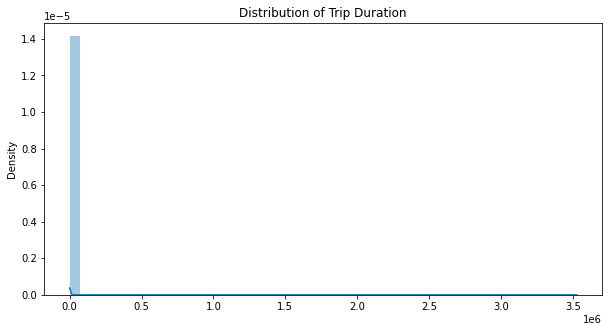

In [ ]:
# Dependent variable 'trip_duration'

# Create a new figure with a size of 10x5 using matplotlib
plt.figure(figsize=(10,5))

# Use seaborn to plot the distribution of the 'trip_duration' column from the dataframe 'df'
# The resulting plot is a density plot that shows the frequency of different trip duration values
sns.distplot(df['trip_duration'].values)

# Add a title to the plot
plt.title('Distribution of Trip Duration')

# Display the plot
plt.show()

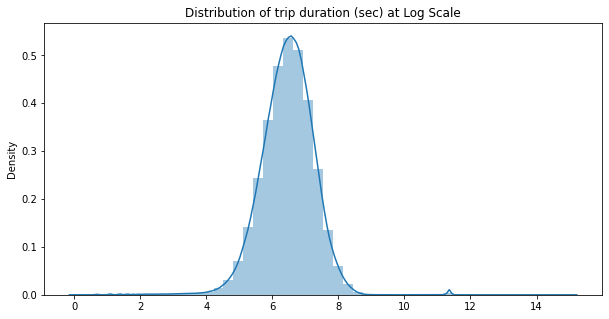

In [ ]:
# Set the size of the plot and create a histogram with log-transformed trip duration values
plt.figure(figsize=(10, 5))
sns.distplot(np.log(df['trip_duration'].values)).set_title('Distribution of Trip Duration')

# Add a title to the plot
plt.title('Distribution of trip duration (sec) at Log Scale')

# Display the plot
plt.show()

**The distribution of the trip duration variable after log transformation is approximately normal.**

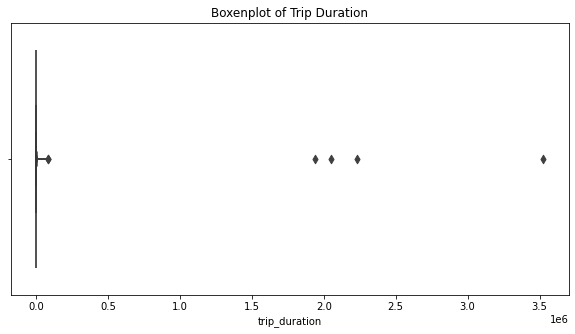

In [ ]:
# Plotting to check the outliers 
plt.figure(figsize=(10, 5))
sns.boxenplot(df['trip_duration'])
plt.title('Boxenplot of Trip Duration')
plt.show()

**Some outliers are present in the dependent variable, which should be removed for data consistency.**

### **Checking Outliers and Removing**

In [ ]:
# loop through each 10th percentile from 0 to 100
for i in range(0, 100, 10):
    # extract the trip duration values from the dataframe and sort them in ascending order
    trip_dur = df['trip_duration'].values
    trip_dur = np.sort(trip_dur, axis=None)
    
    # calculate the value at the current percentile and print it out
    percentile_val = int(len(trip_dur) * (float(i) / 100))
    print("{} percentile value -> {}".format(i, trip_dur[percentile_val]))
    
# calculate and print the 100th percentile value
trip_dur = df['trip_duration'].values
trip_dur = np.sort(trip_dur, axis=None)
print("100 percentile value -> ", trip_dur[-1])

0 percentile value -> 1
10 percentile value -> 245
20 percentile value -> 348
30 percentile value -> 446
40 percentile value -> 548
50 percentile value -> 662
60 percentile value -> 798
70 percentile value -> 968
80 percentile value -> 1208
90 percentile value -> 1634
100 percentile value ->  3526282


After running the code to calculate the percentiles of the trip_duration variable in the dataframe, we found that there were some inconsistencies in the values between the 90th and 100th percentiles. To prepare our data for further analysis, we will need to either remove or correct these values, which may be erroneous or outliers.

In [ ]:
# Loop over percentiles from 90 to 99
for i in range(90, 100):
    # Extract the 'trip_duration' column from the dataframe as a numpy array
    trip_dur = df['trip_duration'].values
    # Sort the 'trip_dur' array in ascending order
    trip_dur = np.sort(trip_dur, axis=None)
    # Calculate the index of the element corresponding to the current percentile
    index = int(len(trip_dur) * (float(i) / 100))
    # Print the value at the current percentile
    print("{} Specific percentile value -> {}".format(i, trip_dur[index]))

# Extract the 'trip_duration' column from the dataframe as a numpy array
trip_dur = df['trip_duration'].values
# Sort the 'trip_dur' array in ascending order
trip_dur = np.sort(trip_dur, axis=None)
# Print the maximum value in the 'trip_dur' array, which corresponds to the 100th percentile
print("100 percentile value -> ", trip_dur[-1])

90 Specific percentile value -> 1634
91 Specific percentile value -> 1703
92 Specific percentile value -> 1780
93 Specific percentile value -> 1869
94 Specific percentile value -> 1975
95 Specific percentile value -> 2104
96 Specific percentile value -> 2273
97 Specific percentile value -> 2497
98 Specific percentile value -> 2829
99 Specific percentile value -> 3440
100 percentile value ->  3526282


In [ ]:
# Group the number of trips by the duration of the trip, using a pandas cut function to bin the data into 10-minute intervals
trip = df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count()
trip

trip_duration
(1, 601]        654140
(601, 1201]     509505
(1201, 1801]    182014
(1801, 2401]     63529
(2401, 3001]     25633
(3001, 3601]     11492
(3601, 4201]      5410
(4201, 4801]      2631
(4801, 5401]      1161
(5401, 6001]       529
(6001, 6601]       221
Name: trip_duration, dtype: int64

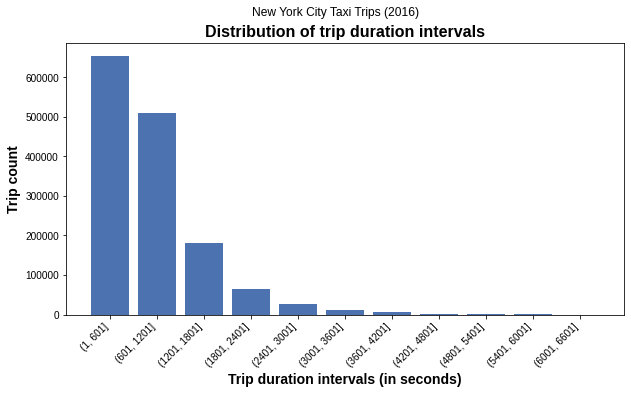

In [ ]:
import matplotlib.pyplot as plt

# Group the number of trips with respect to trip duration
trip = df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1, 7200, 600))).count()

# Create a bar plot of trip counts vs trip duration intervals
plt.figure(figsize=(10, 5))
plt.bar(trip.index.astype(str), trip.values, color='#4C72B0', width=0.8)

# Set the x-axis label and rotate the x-axis labels
plt.xlabel('Trip duration intervals (in seconds)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Set the y-axis label
plt.ylabel('Trip count', fontsize=14, fontweight='bold')

# Set the title and subtitle of the plot
plt.title('Distribution of trip duration intervals', fontsize=16, fontweight='bold')
plt.suptitle('New York City Taxi Trips (2016)', fontsize=12)

# Set the background style and grid lines
plt.style.use('seaborn-whitegrid')

# Show the plot
plt.show()

From the plot, it is evident that a significant proportion of the trips are completed within an hour (3600 seconds), as shown by the high count values in the first few data points. However, there are very few trips with a duration greater than 5000 seconds, and some with very short durations as low as 1 second (for 0 km distance).

In [ ]:
# We need to remove any outliers that are present in the data to ensure data consistency
# Remove trips with duration greater than 5000 seconds
df = df[df.trip_duration <= 5000]

# Remove trips with duration less than 60 seconds
df = df[df.trip_duration >= 60]

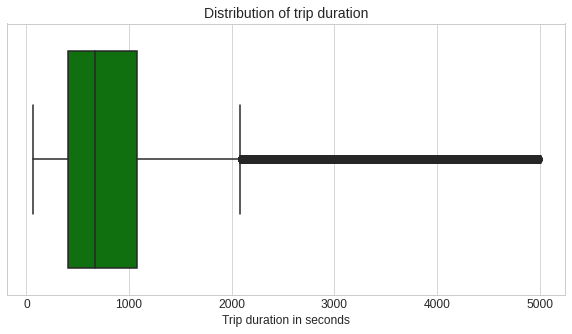

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,5))

# Customize the plot
sns.boxplot(x=df['trip_duration'], ax=ax, color='green')
ax.set_xlabel('Trip duration in seconds', fontsize=12)
ax.set_title('Distribution of trip duration', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot
plt.show()

Mostly, trips are completed within 10-20 minutes, with some trips taking up to 30 minutes (1800 seconds).

# **Number of Passengers**

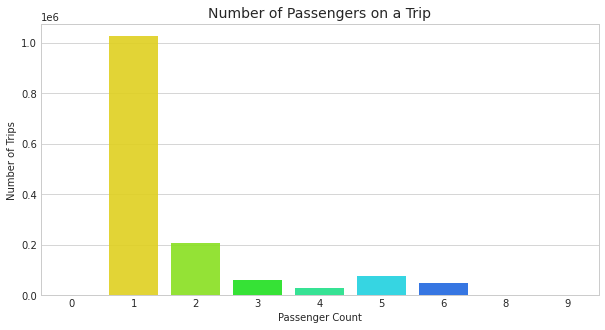

In [ ]:
# Exploring the passenger_count and visualizing it through a barplot
fig = plt.figure(figsize=(10, 5))

# Grouping the data based on passenger_count and getting the counts
passenger = df['passenger_count'].value_counts()

# Creating the barplot using seaborn
sns.barplot(x=passenger.index, y=passenger, alpha=0.9, palette='gist_rainbow')

# Setting the title and labels of the plot
plt.title('Number of Passengers on a Trip', fontsize=14)
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')

# Setting the style of the plot
sns.set_style('darkgrid')

# Displaying the plot
plt.show()

From the above plot, it is evident that most cab or taxi trips have a maximum of 1 passenger, which is ideal for any trip. However, there are some instances where more than 6 passengers have been reported, as well as some instances where there were no passengers at all, which is an impossible situation.

In [ ]:
# Filtering out rows with zero or more than 6 passengers
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count'] <= 6]

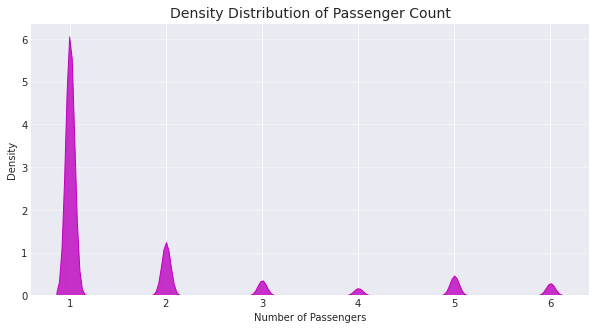

In [ ]:
# Plotting the density distribution of passenger count
plt.figure(figsize=(10, 5))

# Using seaborn's kdeplot to visualize the density distribution of passenger count
sns.kdeplot(x='passenger_count', data=df, bw_adjust=.6, fill=True, color='m', alpha=.8)

# Setting plot title and labels
plt.title('Density Distribution of Passenger Count', fontsize=14)
plt.xlabel('Number of Passengers')
plt.ylabel('Density')

# Removing the plot frame
sns.despine(left=True)

# Adding a background grid
plt.grid(axis='y', alpha=0.5)

# Displaying the plot
plt.show()


The data shows that the majority of passengers are single travelers, making up the highest proportion of total passengers compared to those who travel in groups.

# **Number of trips taken each day**

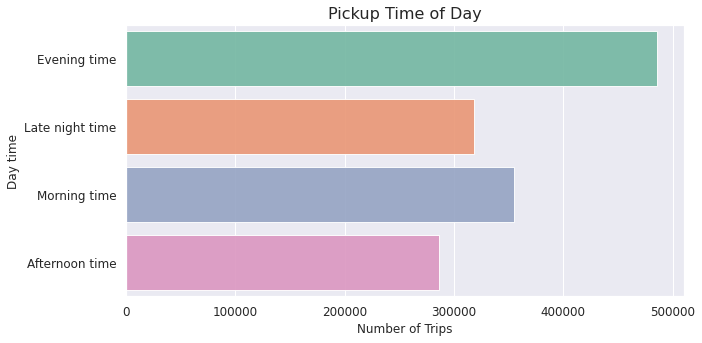

In [ ]:
# Count of trips per time_slots
plt.figure(figsize=(10, 5))
sns.set(style='darkgrid')
sns.countplot(y='pickuptime_of_day', data=df, palette='Set2', alpha=0.9)
plt.title('Pickup Time of Day', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Day time', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The evening hours are a vibrant time for those who travel.

# **Number of trips taken per hour of the day**

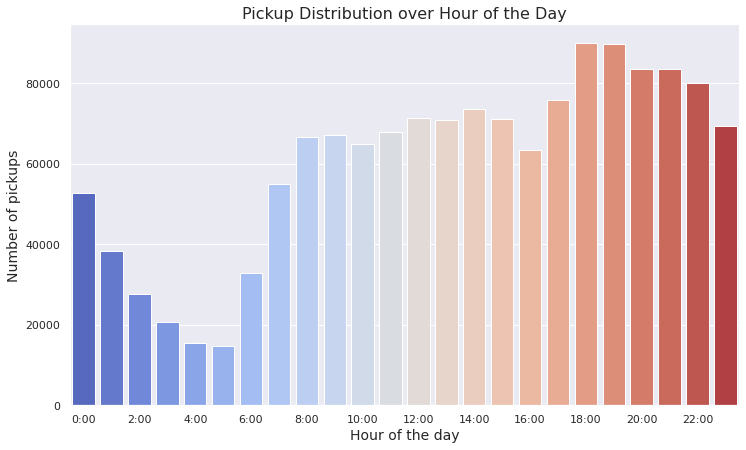

In [ ]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Define color palette
color_palette = sns.color_palette('coolwarm', n_colors=24)

# Plot the count of pickups per hour of the day
sns.countplot(x='pickup_hour', data=df, palette=color_palette, ax=ax)

# Set x- and y-labels and title
ax.set_xlabel('Hour of the day', fontsize=14)
ax.set_ylabel('Number of pickups', fontsize=14)
ax.set_title('Pickup Distribution over Hour of the Day', fontsize=16)

# Set the x-axis tick labels to display every other hour
ax.set_xticklabels([f'{hour}:00' if hour % 2 == 0 else '' for hour in range(24)])

# Remove the top and right spines
sns.despine(top=True, right=True)

# Display the plot
plt.show()

From the above plot, it can be clearly seen that the peak time for travelling is between 6.00 pm to 7.00 pm in the evening. This is due to the fact that this is the time when a majority of the working class people and the people going to the markets prefer to travel.

# **Number of trips taken per Weekday**

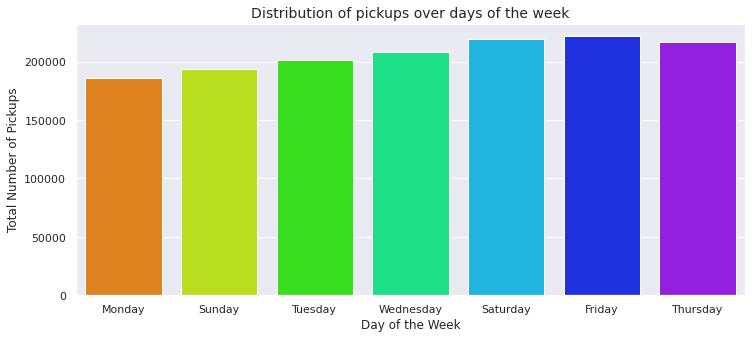

In [ ]:
# Distribution of pickup over days of the week
plt.figure(figsize=(12, 5))
sns.countplot(x='pickup_weekday', data=df, palette='gist_rainbow')
plt.title('Distribution of pickups over days of the week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Pickups')
plt.show()

From the above plot it can be seen that Friday is the busiest day, followed by Saturday and Thursday. This may be due to the proximity of the weekend. Monday is the least busy day.

# **Number of trips taken each Month**

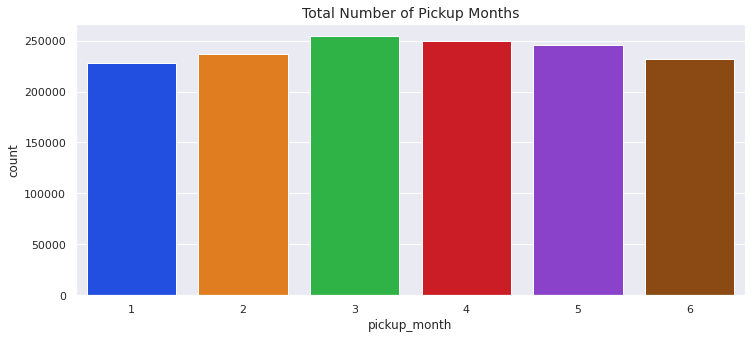

In [ ]:
# Create a figure with the given size
pick_month = plt.figure(figsize = (12,5))

# Create a countplot of pickup months using the 'countplot' function from Seaborn
sns.countplot(x='pickup_month', data=df, palette='bright')

# Set the title of the plot and the font size
plt.title('Total Number of Pickup Months',fontsize=14)

# Show the plot
plt.show()

No significant differences are observed between the months, so no specific insights can be derived.

# **Distance distribution**

In [ ]:
# count the occurrences of each unique value in the 'distance' column of the 'df' DataFrame
df.distance_km.value_counts()

0.000000    4216
0.000424      14
0.000848       8
0.000424       8
0.001273       6
            ... 
4.218078       1
8.860892       1
1.498127       1
2.917715       1
1.134044       1
Name: distance_km, Length: 1441975, dtype: int64

In [ ]:
# Get summary statistics for the 'distance' column of the 'df' DataFrame
df.distance_km.describe()

count    1.446257e+06
mean     3.441529e+00
std      4.252382e+00
min      0.000000e+00
25%      1.243735e+00
50%      2.104166e+00
75%      3.882887e+00
max      1.240910e+03
Name: distance_km, dtype: float64

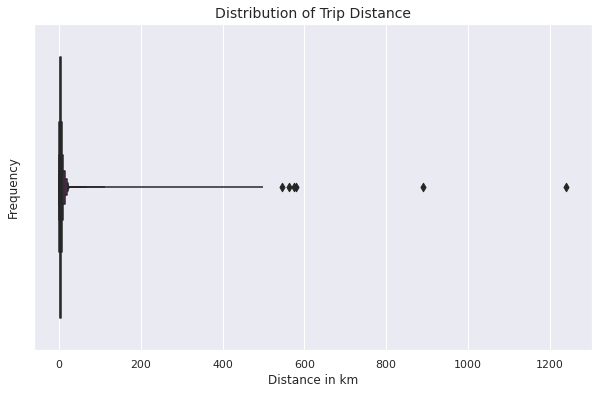

In [ ]:
# Plotting the distribution of distance for checking if there is any outlier or not
plt.figure(figsize=(10, 6))
sns.boxenplot(x=df.distance_km, color='purple')

# Set the title and axis labels
plt.title('Distribution of Trip Distance', fontsize=14)
plt.xlabel('Distance in km')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The above boxplot shows that some trips have a distance above 100 km, with a maximum range of 1200 km. However, there are also trips that appear to have a distance of 0 km, which may indicate cancellations or other issues with the taxi or the passenger. It's also worth noting that the plot does not provide any information about the dropoff location.

In [ ]:
# Removing distance outliers
# Trips with distance greater than 100 km and less than 1 km will be removed

df = df[~(df.distance_km > 100)]
df = df[~(df.distance_km < 1)]

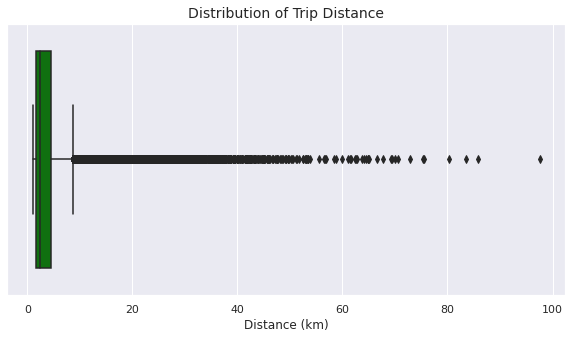

In [ ]:
# Box plot for distance column after removing outliers
plt.figure(figsize = (10,5))

# Creating box plot using Seaborn library
sns.boxplot(df.distance_km, color='green')

# Adding title and labels to the plot
plt.title('Distribution of Trip Distance', fontsize=14)
plt.xlabel('Distance (km)')

# Displaying the plot
plt.show()

Showing the updated value of distance_km variable between 0 to 100 km.

# **Speed distribution**

In [ ]:
# Count the number of trips for each speed value
df.speed.value_counts()


9.580937     2
11.856445    1
24.973026    1
12.398293    1
10.174206    1
            ..
19.711113    1
13.742299    1
8.855924     1
5.859783     1
20.618973    1
Name: speed, Length: 1209250, dtype: int64

In [ ]:
# Descriptive statistics of the 'speed' column
df.speed.describe()

count    1.209251e+06
mean     1.523585e+01
std      7.799828e+00
min      7.774623e-01
25%      9.882900e+00
50%      1.354738e+01
75%      1.867582e+01
max      5.837351e+02
Name: speed, dtype: float64

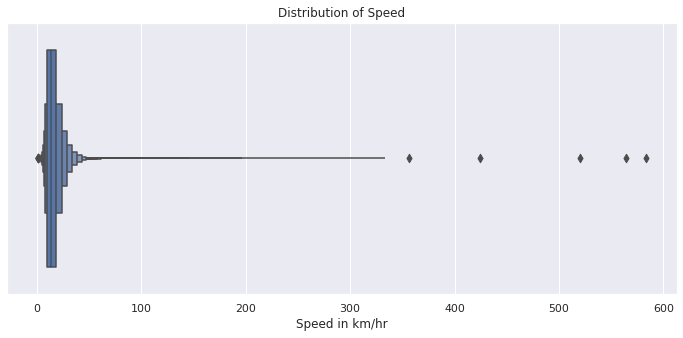

In [ ]:
# Boxen plot of speed values
plt.figure(figsize=(12, 5))  # set figure size
sns.boxenplot(x=df.speed)  # plot boxenplot of speed values
plt.xlabel('Speed in km/hr')  # set x label
plt.title('Distribution of Speed')  # set title
plt.show()  # display plot

The following graph shows the distribution of speed across the entire dataset, including any outliers.

In [ ]:
# To check largest value of speed - Top 20
df.speed.nlargest(20)

693299     583.735119
1359910    564.207996
218935     520.505485
500725     424.861400
473439     356.616631
191997     318.579993
793555     270.595429
1328401    255.419839
176589     226.716076
656806     197.129407
1035451    195.136268
1166323    190.931835
1327633    188.464178
775976     180.811877
945772     166.043252
125668     163.573989
587146     160.768363
13046      153.559290
182695     146.281407
1093421    144.334947
Name: speed, dtype: float64

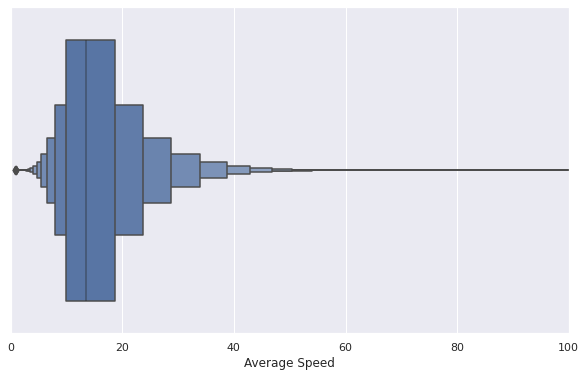

In [ ]:
# Plotting again to check its distribution as average speed
plt.figure(figsize=(10, 6))
sns.boxenplot(df.speed)
plt.xlabel('Average Speed')
plt.xlim(0, 100)  # Set the x-axis limits to zoom in on speed values between 0 and 100
plt.show()

The data shows that there are values above the maximum speed limit of 40 km/h set by New York City (NYC). The average speed of the values is even higher than 60 km/h, which is unreasonable.

In [ ]:
# Filter out the trips with average speed greater than 60 km/h
df = df[~(df.speed > 60)]

In [ ]:
# Displaying the 20 smallest values of speed
df.speed.nsmallest(20)

1165873    0.777462
24426      0.825900
1025910    0.877407
1440074    0.900916
1453671    0.913801
440689     0.954780
210725     0.962457
985326     0.988256
623249     0.991219
251672     0.998664
113098     1.006520
224795     1.040899
633226     1.053434
722364     1.058744
28169      1.061677
1359058    1.062566
676578     1.064532
900628     1.064742
305608     1.075162
116907     1.082382
Name: speed, dtype: float64

We can see that there are some values with a speed of 0 km/h which are not relevant for further analysis and should be removed.

In [ ]:
# Removing the values having average speed less than 1 km/h
df = df[~(df.speed < 1)]

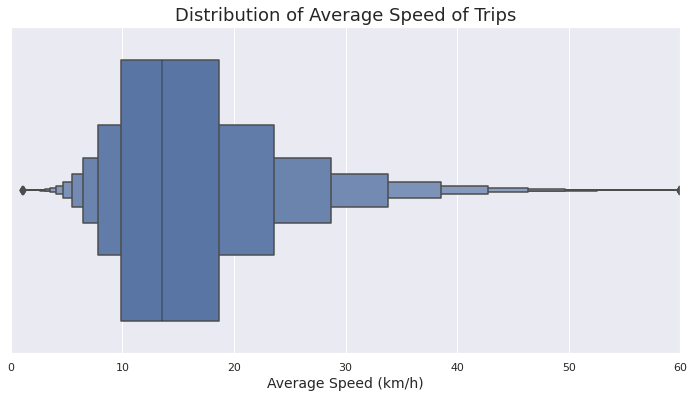

In [ ]:
# Plotting the distribution of average speed after removing the values having average speed less than 1 km/h
plt.figure(figsize = (12, 6))

sns.boxenplot(x=df.speed, color='b')

plt.title("Distribution of Average Speed of Trips", fontsize=18)
plt.xlabel("Average Speed (km/h)", fontsize=14)
plt.xlim(0, 60)

plt.show()

The plot depicts the range of speeds from 0 to 60 km/h.

# **Store and Forward Flag**

In [ ]:
# Analyzing the Store & Forward Flag
# Counting the number of values for the Store and Forward Flag
df['store_and_fwd_flag'].value_counts()

N    1202056
Y       6785
Name: store_and_fwd_flag, dtype: int64

In [ ]:
# Normalizing the values of 'store_and_fwd_flag'
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994387
Y    0.005613
Name: store_and_fwd_flag, dtype: float64

It appears that only 0.99% to 1% of the vehicle trip details were stored in the memory before being sent to the server. This may be due to a low battery issue in the GPS or mobile device.

# **Distribution of trip duration per Vendor**

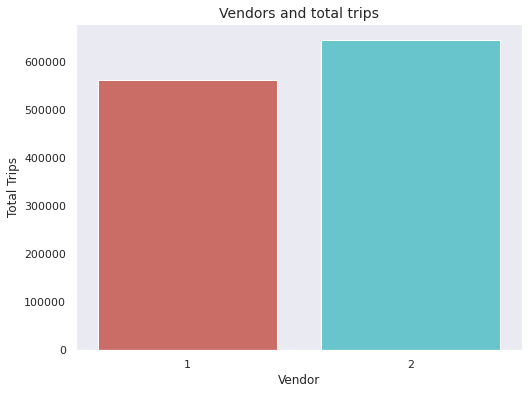

In [ ]:
# Counting total trips for each vendor
vendors = df['vendor_id'].value_counts()

# Plotting bar graph of vendors and their total trips
plt.figure(figsize=(8,6))
sns.barplot(x=vendors.index, y=vendors.values, palette='hls')

# Adding labels and title
plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.title("Vendors and total trips", fontsize=14)

# Adding gridlines
plt.grid(axis='y')

# Displaying the plot
plt.show()

The bar plot does not show a significant difference in the number of trips taken across vendors.

In [ ]:
# Group trip durations by the speed ranges, where the speed ranges are defined by 
# bins with a width of 10
speed_ranges = pd.cut(df.speed, np.arange(1,70,10))

# Count the number of trips that fall into each speed range by grouping the trip 
# durations by the speed ranges and counting the number of elements in each group.
trip_counts = df.trip_duration.groupby(speed_ranges).count()

# Store the resulting counts in the variable sp.
sp = trip_counts
sp

speed
(1, 11]     396063
(11, 21]    594749
(21, 31]    162916
(31, 41]     42380
(41, 51]     10997
(51, 61]      1736
Name: trip_duration, dtype: int64

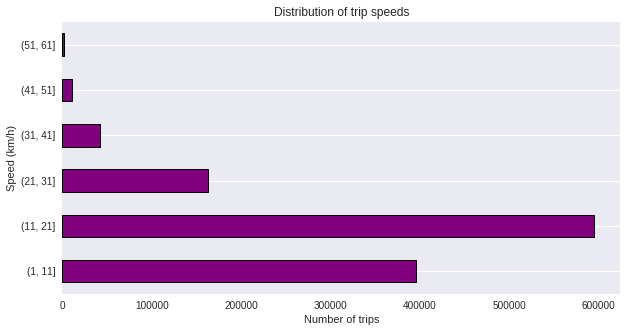

In [ ]:
# Import the required libraries and set the style
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Set the size and title of the plot
plt.figure(figsize=(10, 5))
plt.title('Distribution of trip speeds')

# Create a horizontal bar chart of the trip counts by speed range
sp.plot(kind='barh', color='purple', edgecolor='black', linewidth=1)

# Set the labels for the x-axis and y-axis
plt.xlabel('Number of trips')
plt.ylabel('Speed (km/h)')

# Set the tick marks and grid lines
plt.xticks(rotation=0)
plt.grid(axis='x')

# Show the plot
plt.show()

The majority of the trips were completed at speeds between 10 km/h and 20 km/h, with a peak at 10 km/h. This suggests that the trips were mostly within the city and involved short distances.

# **Bivariate Analysis**

## **Duration of trip per Hour**

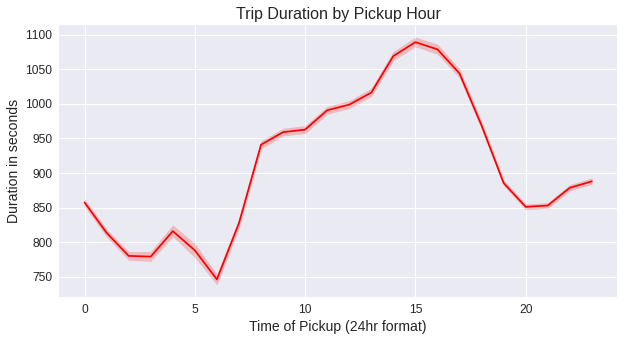

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10,5))

# Plot the line chart with pickup_hour on the x-axis and trip_duration on the y-axis
sns.lineplot(x='pickup_hour', y='trip_duration', data=df, color='red', palette="Set2")

# Add a title to the plot
plt.title('Trip Duration by Pickup Hour', fontsize=16)

# Add x and y axis labels and adjust their font sizes
plt.xlabel('Time of Pickup (24hr format)', fontsize=14)
plt.ylabel('Duration in seconds', fontsize=14)

# Adjust the font size of the x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

The duration of trips peaks around 3pm but is at its lowest around 6am in the early morning.

# **Duration of trip per Month**

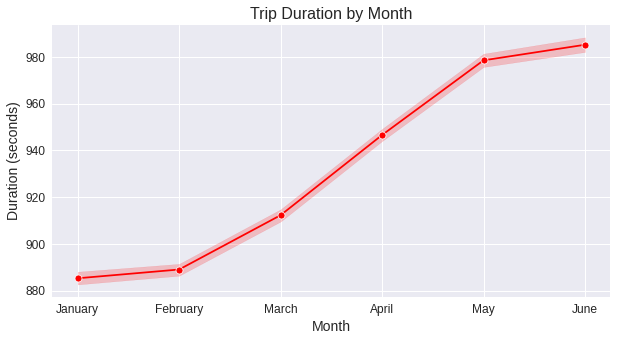

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10,5))

# Create a line plot with pickup_month on the x-axis and trip_duration on the y-axis
sns.lineplot(x='pickup_month', y='trip_duration', data=df, color='red', marker='o')

# Add a title to the plot
plt.title('Trip Duration by Month', fontsize=16)

# Add x and y axis labels and adjust their font sizes
plt.xlabel('Month', fontsize=14)
plt.ylabel('Duration (seconds)', fontsize=14)

# Set the x-tick labels to show the month name instead of the numeric month value
month_names = ['January', 'February', 'March', 'April', 'May', 'June']
plt.xticks(range(1, 7), month_names, fontsize=12)

# Adjust the font size of the y tick labels
plt.yticks(fontsize=12)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

The trip duration gradually increases over the first five months, with the lowest duration in the starting month. A sharp rise is seen in the fifth month, indicating a sudden spike in activity.

# **Duration of trip per Weekday**

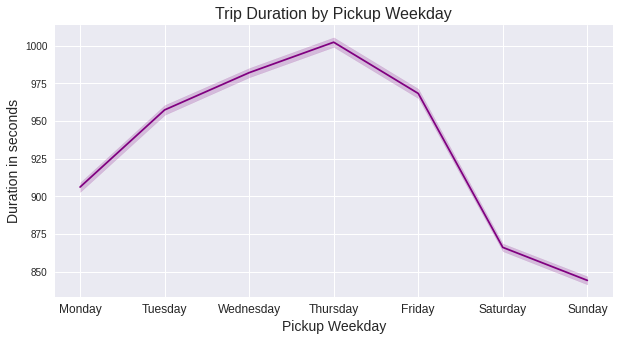

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10, 5))

# Create a line plot of trip duration vs pickup weekday
sns.lineplot(x='pickup_day_num', y='trip_duration', data=df, color='purple')

# Add a label to the y-axis
plt.ylabel('Duration in seconds', fontsize=14)

# Add a label to the x-axis and adjust its font size
plt.xlabel('Pickup Weekday', fontsize=14)

# Add custom tick labels to the x-axis
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), weekday_labels, fontsize=12)

# Add a title to the plot and adjust its font size
plt.title('Trip Duration by Pickup Weekday', fontsize=16)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

Thursday appears to be the busiest day of the week, with a high number of trips. However, there is a sudden drop in the trip number on Sunday, which could be attributed to people preferring to rest at home on days with no office or school/college. Additionally, the plot reveals a change in the trip duration.

# **Trips as per weekdays and Hours**

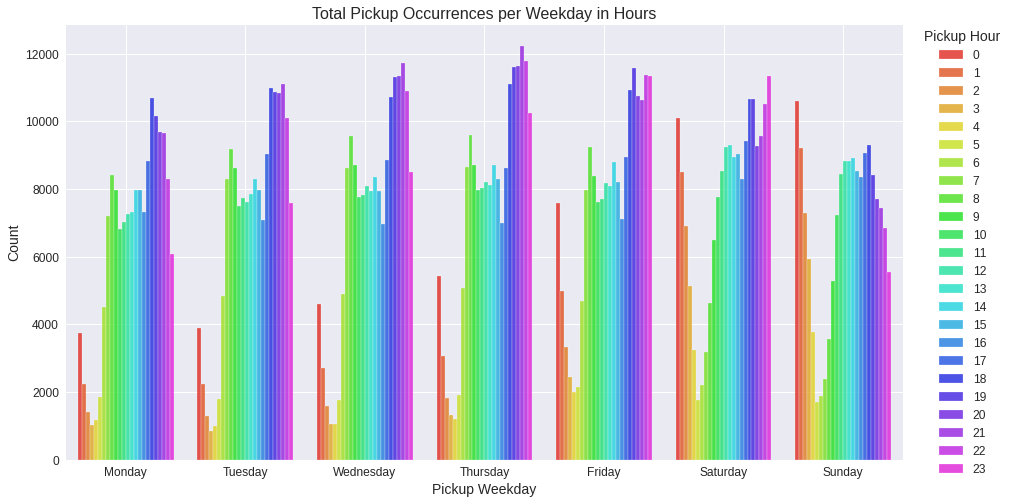

In [ ]:
# Set the size of the figure
fig = plt.figure(figsize=(15, 8))

# Create a countplot with pickup day number on the x-axis, using a different hue for each pickup hour
sns.countplot(x='pickup_day_num', data=df, palette='gist_rainbow', hue='pickup_hour', alpha=0.8)

# Add a legend to the plot with the pickup hour categories
legend = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Pickup Hour', fontsize=12)
legend.get_title().set_fontsize('14')

# Add a title to the plot
plt.title('Total Pickup Occurrences per Weekday in Hours', fontsize=16)

# Add x and y axis labels and adjust their font sizes
plt.xlabel('Pickup Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the x-axis tick labels to show the weekday names
plt.xticks([i for i in range(7)],
           ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), fontsize=12)

# Adjust the font size of the y-axis tick labels
plt.yticks(fontsize=12)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

It is evident that the lowest number of trips occur around 6am in the morning across all weekdays. Additionally, the maximum number of trips generally occur between 3pm and 4pm, although there is some variation between days.

# **Overall Speed range and distance per trip**

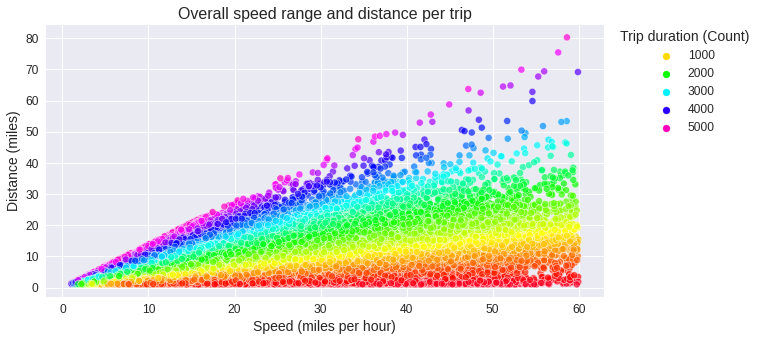

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10,5))

# Create a scatter plot with speed on the x-axis, distance on the y-axis, and trip duration as the color
sns.scatterplot(data=df, x="speed", y="distance_km", hue="trip_duration", palette='gist_rainbow', alpha=0.7, s=50)

# Add a legend to the plot with the count of trip durations
legend = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title= 'Trip duration (Count)', fontsize=12)
legend.get_title().set_fontsize('14')

# Add a title to the plot
plt.title("Overall speed range and distance per trip", fontsize=16)

# Add x and y axis labels and adjust their font sizes
plt.xlabel('Speed (miles per hour)', fontsize=14)
plt.ylabel('Distance (miles)', fontsize=14)

# Adjust the font size of the x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

It can be observed that travelling at 60 km/hr allows for the maximum distance to be covered.

# **Trip duration and Distance**

In [ ]:
# Filter out trips with 0 distance
df = df[~(df.distance_km == 0)]

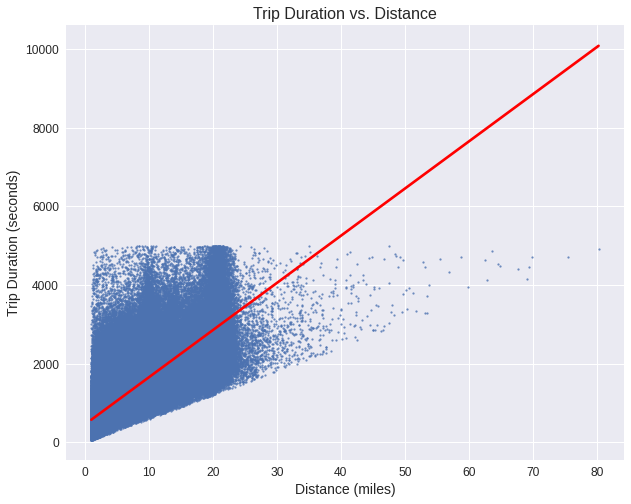

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10,8))

# Plot a regression line for trip duration vs. distance
sns.regplot(x='distance_km', y='trip_duration', data=df, scatter_kws={'s': 5},
            line_kws={'color': 'red'})

# Add a title to the plot
plt.title('Trip Duration vs. Distance', fontsize=16)

# Add x and y axis labels and adjust their font sizes
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Trip Duration (seconds)', fontsize=14)

# Adjust the font size of the x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines to the plot to make it easier to read
plt.grid(True)

# Show the plot
plt.show()

A linear regression line showing the relationship between trip duration and distance can be observed.

# **Feature Engineering**

## **Feature Encoding**

In [ ]:
# Column Analysis
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'pickup_day_num', 'dropoff_weekday', 'distance_km', 'speed',
       'pickuptime_of_day'],
      dtype='object')

In [ ]:
# Convert the "store_and_fwd_flag" column to dummy variables and add it to the dataframe
dummy = pd.get_dummies(df.store_and_fwd_flag, prefix='store_and_fwd_flag')
df = pd.concat([df,dummy], axis = 1)

# Convert the "pickup_weekday" column to dummy variables and add it to the dataframe, dropping the first column
# (which will serve as the reference category)
dummy = pd.get_dummies(df.pickup_weekday, prefix='pickup_day', drop_first=True)
df = pd.concat([df,dummy], axis = 1)

In [ ]:
# Create a new column called "trip_duration_hr" by dividing the "trip_duration" column by 3600 (the number of seconds in an hour)
df['trip_duration_hr'] = df['trip_duration'] / 3600

In [ ]:
# Updated column of dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'pickup_day_num', 'dropoff_weekday', 'distance_km', 'speed',
       'pickuptime_of_day', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y',
       'pickup_day_Monday', 'pickup_day_Saturday', 'pickup_day_Sunday',
       'pickup_day_Thursday', 'pickup_day_Tuesday', 'pickup_day_Wednesday',
       'trip_duration_hr'],
      dtype='object')

In [ ]:
# Remove the unnecessary columns from the dataframe as they will not be used in the further analysis.
df = df.drop(['id','pickup_datetime', 'dropoff_datetime',
              'store_and_fwd_flag', 
              'dropoff_weekday', 'pickup_weekday', 
              'pickuptime_of_day', 'trip_duration', 'speed', 'pickup_day_num'], axis=1)

In [ ]:
# Set the maximum number of columns to display in Pandas to 'None'
pd.set_option('max_columns', None)

# Print the first few rows of the updated dataframe 'df' to check the changes made to the data
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_month,distance_km,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,trip_duration_hr
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,0.126389
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,0.184167
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,6.385107,1,0,0,0,0,0,1,0,0.590000
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,1.485500,1,0,0,0,0,0,0,1,0.119167
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,1.188590,1,0,0,1,0,0,0,0,0.120833


In [ ]:
# Finding the number of rows and columns in the dataset
df.shape

(1208841, 18)

In [ ]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208841 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1208841 non-null  int64  
 1   passenger_count       1208841 non-null  int64  
 2   pickup_longitude      1208841 non-null  float64
 3   pickup_latitude       1208841 non-null  float64
 4   dropoff_longitude     1208841 non-null  float64
 5   dropoff_latitude      1208841 non-null  float64
 6   pickup_hour           1208841 non-null  int64  
 7   pickup_month          1208841 non-null  int64  
 8   distance_km           1208841 non-null  float64
 9   store_and_fwd_flag_N  1208841 non-null  uint8  
 10  store_and_fwd_flag_Y  1208841 non-null  uint8  
 11  pickup_day_Monday     1208841 non-null  uint8  
 12  pickup_day_Saturday   1208841 non-null  uint8  
 13  pickup_day_Sunday     1208841 non-null  uint8  
 14  pickup_day_Thursday   1208841 non-

The dataset is now ready to be used for model preparation and prediction analysis.

## **Splitting the dataset into a training set and a test set for the purpose of fitting it to specific models.**

In [ ]:
# Retrieve the column names of the dataframe that contain numerical data, excluding the last column (the target variable)
col = df.describe().columns
# Convert the column names to a list
col = list(col)
# Remove the last element from the list (the target variable), as it is not needed for this analysis
col = col[:-1]
col

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'pickup_hour',
 'pickup_month',
 'distance_km',
 'store_and_fwd_flag_N',
 'store_and_fwd_flag_Y',
 'pickup_day_Monday',
 'pickup_day_Saturday',
 'pickup_day_Sunday',
 'pickup_day_Thursday',
 'pickup_day_Tuesday',
 'pickup_day_Wednesday']

In [ ]:
#Importing Library
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [ ]:
# Standardize the input features using z-score
X = df[col].apply(zscore)[:]

# Select the target variable (trip_duration_hr)
y = df['trip_duration_hr'][:]

In [ ]:
# Split the preprocessed data into a training set and a test set
# The test set will be 20% of the data
# The random_state parameter is used to ensure that the same split is obtained each time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Print the shape of the training set input features (X_train) and the target variable (y_train)
print(X_train.shape, y_train.shape)

(967072, 17) (967072,)


In [ ]:
# Print the shape of the test set
print(X_test.shape, y_test.shape)

(241769, 17) (241769,)


# **Algorithm Development**

## **Correlation between Variables**

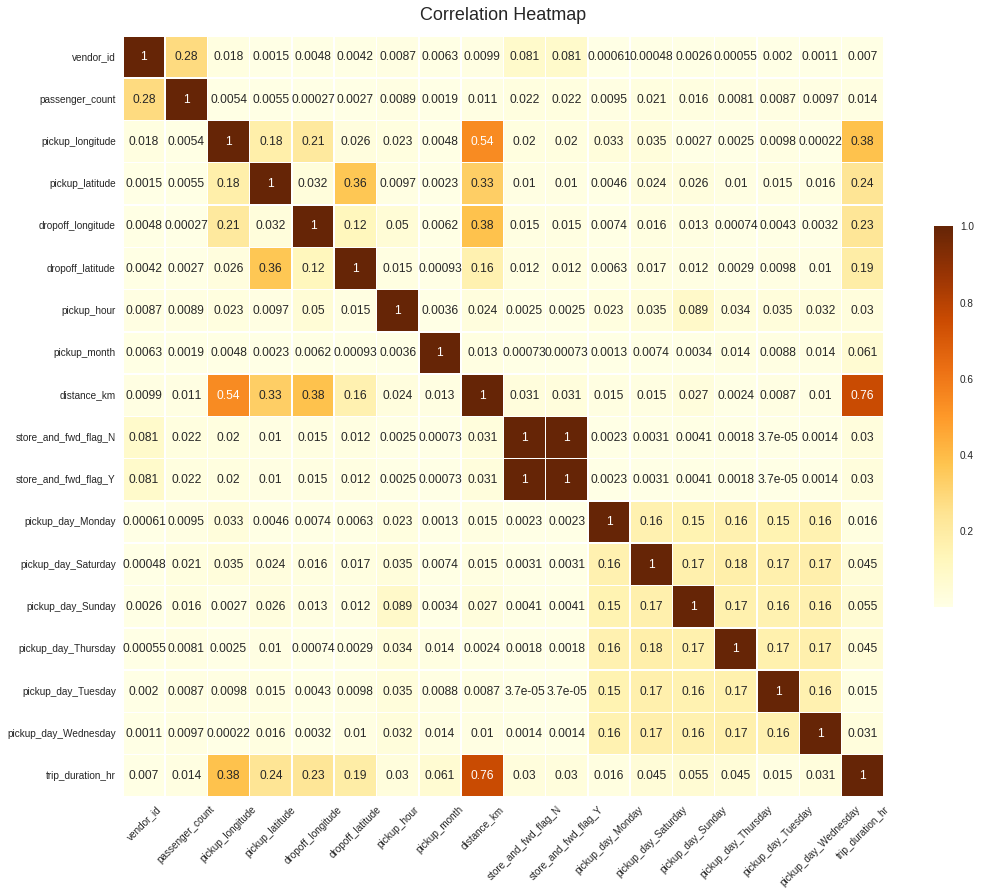

In [ ]:
# Set the figure size for the heatmap
fig, ax = plt.subplots(figsize=(18, 14))

# Calculate the correlation matrix for the dataframe
correlation = df.corr()

# Create the heatmap using Seaborn's heatmap function
heatmap = sns.heatmap(abs(correlation), 
                      annot=True, # Add numeric values to the cells
                      cmap='YlOrBr', # Set the color map
                      square=True, # Make the cells square
                      linewidths=.5, # Add some space between cells
                      cbar_kws={"shrink": .5}, # Shrink the color bar
                      ax=ax) 

# Add a title to the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,pickup_month,distance_km,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,trip_duration_hr
vendor_id,1.000000,0.284618,0.018119,0.001544,0.004750,0.004224,0.008711,-0.006281,0.009863,0.080540,-0.080540,-0.000613,-0.000482,0.002621,-0.000550,0.001954,-0.001116,0.006968
passenger_count,0.284618,1.000000,0.005360,-0.005522,0.000265,-0.002664,0.008864,-0.001930,0.010517,0.021553,-0.021553,-0.009483,0.020779,0.015908,-0.008141,-0.008739,-0.009704,0.013654
pickup_longitude,0.018119,0.005360,1.000000,-0.178245,0.214547,0.025967,0.022599,0.004801,0.540910,-0.019671,0.019671,0.032600,-0.034508,0.002731,-0.002476,0.009790,-0.000224,0.382754
pickup_latitude,0.001544,-0.005522,-0.178245,1.000000,0.031684,0.363674,0.009746,-0.002292,-0.333783,0.010461,-0.010461,0.004589,-0.023934,-0.026467,0.010411,0.014636,0.016061,-0.241765
dropoff_longitude,0.004750,0.000265,0.214547,0.031684,1.000000,0.122385,-0.050224,0.006228,0.380905,-0.015108,0.015108,0.007419,-0.016418,0.013472,0.000736,-0.004345,-0.003183,0.233218
dropoff_latitude,0.004224,-0.002664,0.025967,0.363674,0.122385,1.000000,0.014805,-0.000928,-0.163275,0.011896,-0.011896,0.006332,-0.016929,-0.011596,0.002872,0.009782,0.010068,-0.188236
pickup_hour,0.008711,0.008864,0.022599,0.009746,-0.050224,0.014805,1.000000,-0.003562,-0.023809,-0.002526,0.002526,0.022959,-0.035130,-0.089174,0.033510,0.034683,0.032067,0.030356
pickup_month,-0.006281,-0.001930,0.004801,-0.002292,0.006228,-0.000928,-0.003562,1.000000,0.013332,-0.000733,0.000733,0.001319,-0.007361,-0.003370,0.013775,0.008846,0.013906,0.060536
distance_km,0.009863,0.010517,0.540910,-0.333783,0.380905,-0.163275,-0.023809,0.013332,1.000000,-0.030821,0.030821,0.015459,-0.015149,0.027390,-0.002446,-0.008663,-0.010368,0.756536
store_and_fwd_flag_N,0.080540,0.021553,-0.019671,0.010461,-0.015108,0.011896,-0.002526,-0.000733,-0.030821,1.000000,-1.000000,-0.002278,0.003073,0.004062,-0.001840,-0.000037,-0.001376,-0.029658


# **1.1 Linear Regression**

In [ ]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Create a linear regression model and fit it to the training data
lreg = LinearRegression().fit(X_train, y_train)

# Calculate the R-squared score of the linear regression model on the training data
train_score = lreg.score(X_train, y_train)
print("Training R-squared score:", train_score)

Training R-squared score: 0.5959768022870975


In [ ]:
# Use the fitted linear regression model to make predictions on the training set
y_train_pred = lreg.predict(X_train)

# Use the fitted linear regression model to make predictions on the test set
y_test_pred = lreg.predict(X_test)

# Compare the predicted values to the actual values in the training and test sets
# This can help us evaluate how well the model is fitting the data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
n_train, k = X_train.shape
adj_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - k - 1))

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
n_test, k = X_test.shape
adj_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - k - 1))

# Print the performance metrics for the training and test sets
print("Training Set Performance:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")
print(f"Adjusted R-squared: {adj_r2_train:.2f}")
print("\nTest Set Performance:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")
print(f"Adjusted R-squared: {adj_r2_test:.2f}")

Training Set Performance:
MSE: 0.01
RMSE: 0.11
R-squared: 0.60
Adjusted R-squared: 0.60

Test Set Performance:
MSE: 0.01
RMSE: 0.11
R-squared: 0.60
Adjusted R-squared: 0.60


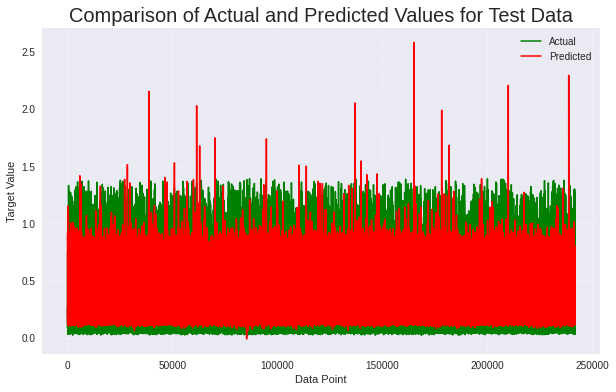

In [ ]:
# Define the figure size and create a new plot
plt.figure(figsize=(10, 6))

# Generate a list of values for the x-axis
x_values = [i for i in range(len(y_test))]

# Plot the actual and predicted values as separate lines
plt.plot(x_values, y_test, color='green', linewidth=1.5, linestyle='-', label='Actual')
plt.plot(x_values, y_test_pred, color='red', linewidth=1.5, linestyle='-', label='Predicted')

# Add a title and labels for the x- and y-axes
plt.title('Comparison of Actual and Predicted Values for Test Data', fontsize=20)
plt.xlabel('Data Point')
plt.ylabel('Target Value')

# Add a legend to the plot
plt.legend()

# Customize the appearance of the plot
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

The underfitting result of the linear regression model indicates a high prediction error, indicating that linear regression is not a suitable model for this data.

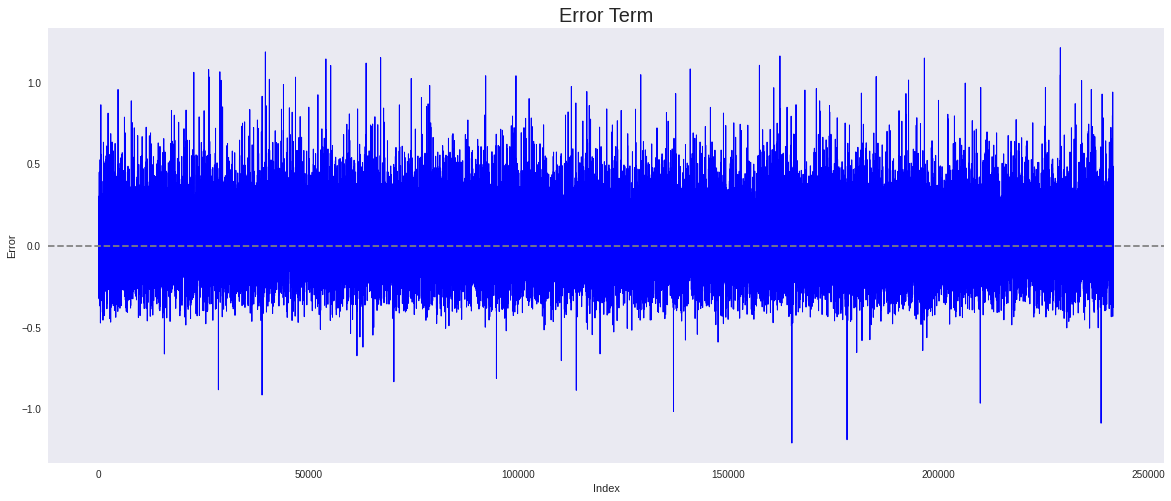

In [ ]:
# Create a figure and set its size
plt.figure(figsize=(20, 8))

# Create a list of indices to use as x-coordinates
c = [i for i in range(len(y_test))]

# Plot the difference between y_test and y_test_pred as a blue line
plt.plot(c, y_test - y_test_pred, color='blue', linewidth=1, linestyle='-')

# Add a title to the plot
plt.title('Error Term', fontsize=20)

# Add labels for the x- and y-axes
plt.xlabel('Index')
plt.ylabel('Error')

# Add a horizontal line at y=0 to indicate the mean error
plt.axhline(y=0, color='gray', linestyle='--')

# Add grid lines to the plot
plt.grid()

# Show the plot
plt.show()

The difference between the test and prediction data can be observed in the error term.

# **1.2 Lasso Regression using LassoCV**

In [ ]:
# Import the required libraries
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an instance of the LassoCV model
# Set the number of cross-validation folds to 5 and the random state to 0
lasso_cv = LassoCV(cv=5, random_state=0)

# Fit the LassoCV model to the training set
lasso_cv.fit(X_train, y_train)

# Print the optimal value of alpha selected by the model
print('Optimal alpha value:', lasso_cv.alpha_)

# Fit the LassoCV model with the best alpha value on the training set
lasso_cv.fit(X_train, y_train)

# Make predictions on the training set
y_lassocv_train_pred = lasso_cv.predict(X_train)

# Compute and print the performance metrics for the training set
lassocv_MSE_tr = mean_squared_error(y_train, y_lassocv_train_pred)
print('LassoCV training MSE:', lassocv_MSE_tr)

lassocv_RMSE_tr = np.sqrt(lassocv_MSE_tr)
print('LassoCV training RMSE:', lassocv_RMSE_tr)

lassocv_R2_tr = r2_score(y_train, y_lassocv_train_pred)
print('LassoCV training R2:', lassocv_R2_tr)

# Compute and print the adjusted R-squared for the training set
lassocv_Ad_R2_tr = 1 - (1 - r2_score(y_train, y_lassocv_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print('LassoCV training adjusted R2:', lassocv_Ad_R2_tr)

# Make predictions on the test set
y_lassocv_test_pred = lasso_cv.predict(X_test)

# Compute and print the performance metrics for the test set
lassocv_MSE_tst = mean_squared_error(y_test, y_lassocv_test_pred)
print('LassoCV test MSE:', lassocv_MSE_tst)

lassocv_RMSE_tst = np.sqrt(lassocv_MSE_tst)
print('LassoCV test RMSE:', lassocv_RMSE_tst)

lassocv_R2_tst = r2_score(y_test, y_lassocv_test_pred)
print('LassoCV test R2:', lassocv_R2_tst)

# Compute and print the adjusted R-squared for the test set
lassocv_Ad_R2_tst = 1 - (1 - r2_score(y_test, y_lassocv_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print('LassoCV test adjusted R2:', lassocv_Ad_R2_tst)

Optimal alpha value: 0.0001346374835124188
LassoCV training MSE: 0.012791370313440228
LassoCV training RMSE: 0.11309894037275606
LassoCV training R2: 0.5959634596577481
LassoCV training adjusted R2: 0.5959563570335039
LassoCV test MSE: 0.012752507276294468
LassoCV test RMSE: 0.11292699976663892
LassoCV test R2: 0.5956711721432578
LassoCV test adjusted R2: 0.5956427396235431


# **1.3 Ridge regression using RidgeCV**

In [ ]:
# Import the required libraries
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an instance of the RidgeCV model
# Set the list of alpha values to try and the number of cross-validation folds to 5
ridge_cv = RidgeCV(alphas=[1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100], cv=5)

# Fit the RidgeCV model to the training set
ridge_cv.fit(X_train, y_train)

# Print the optimal value of alpha selected by the model
print('Optimal alpha value:', ridge_cv.alpha_)

# Fit the RidgeCV model with the best alpha value on the training set
ridge_cv.fit(X_train, y_train)

# Make predictions on the training set
y_ridgecv_train_pred = ridge_cv.predict(X_train)

# Compute and print the performance metrics for the training set
ridgecv_MSE_tr = mean_squared_error(y_train, y_ridgecv_train_pred)
print('RidgeCV training MSE:', ridgecv_MSE_tr)

ridgecv_RMSE_tr = np.sqrt(ridgecv_MSE_tr)
print('RidgeCV training RMSE:', ridgecv_RMSE_tr)

ridgecv_R2_tr = r2_score(y_train, y_ridgecv_train_pred)
print('RidgeCV training R2:', ridgecv_R2_tr)

# Compute and print the adjusted R-squared for the training set
ridgecv_Ad_R2_tr = 1 - (1 - r2_score(y_train, y_ridgecv_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print('RidgeCV training adjusted R2:', ridgecv_Ad_R2_tr)

# Make predictions on the test set
y_ridgecv_test_pred = ridge_cv.predict(X_test)

# Compute and print the performance metrics for the test set
ridgecv_MSE_tst = mean_squared_error(y_test, y_ridgecv_test_pred)
print('RidgeCV test MSE:', ridgecv_MSE_tst)

ridgecv_RMSE_tst = np.sqrt(ridgecv_MSE_tst)
print('RidgeCV test RMSE:', ridgecv_RMSE_tst)

ridgecv_R2_tst = r2_score(y_test, y_ridgecv_test_pred)
print('RidgeCV test R2:', ridgecv_R2_tst)

# Compute and print the adjusted R-squared for the test set
ridgecv_Ad_R2_tst = 1 - (1 - r2_score(y_test, y_ridgecv_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print('RidgeCV test adjusted R2:', ridgecv_Ad_R2_tst)

Optimal alpha value: 30.0
RidgeCV training MSE: 0.012790934904266648
RidgeCV training RMSE: 0.11309701545251602
RidgeCV training R2: 0.5959772127750308
RidgeCV training adjusted R2: 0.5959701103925549
RidgeCV test MSE: 0.01275219438123181
RidgeCV test RMSE: 0.11292561437172617
RidgeCV test R2: 0.5956810927409243
RidgeCV test adjusted R2: 0.5956526609188288


It can be seen that no improvement has been made in the prediction and the model is exhibiting signs of underfitting.

# **1.4 Decision Tree Regressor**

In [ ]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the range of hyperparameters to be tested in GridSearchCV
max_depth = [4, 6, 8, 10]
min_samples_split = [10, 20, 30]
min_samples_leaf = [8, 16, 22]
param_dict_dt = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Store the best hyperparameters found in the previous run in a cache dictionary
cache = {'max_depth': [10], 'min_samples_split': [10], 'min_samples_leaf': [22]}

# Define the decision tree regressor model
dtr = DecisionTreeRegressor()

# Use GridSearchCV to find the best hyperparameters for the model
dtr_grid = GridSearchCV(estimator=dtr, param_grid=cache, cv=5, verbose=2, scoring='r2')
dtr_grid.fit(X_train, y_train)

# Print the best score and the best estimator found in the GridSearchCV
print("Best score: ", dtr_grid.best_score_)
print("Best estimator: ", dtr_grid.best_estimator_)

# Use the best estimator to make predictions on the training set
y_dtr_train_pred = dtr_grid.predict(X_train)

# Use the best estimator to make predictions on the test set
y_dtr_test_pred = dtr_grid.predict(X_test)

# Calculate the evaluation metrics for the training set
dtr_MSE_tr = mean_squared_error(y_train, y_dtr_train_pred)
print("DTR MSE for training set: ", dtr_MSE_tr)

dtr_RMSE_tr = np.sqrt(dtr_MSE_tr)
print("DTR RMSE for training set: ", dtr_RMSE_tr)

dtr_R2_tr = r2_score(y_train, y_dtr_train_pred)
print("DTR R2 for training set: ", dtr_R2_tr)

dtr_Ad_R2_tr = 1 - (1 - r2_score(y_train, y_dtr_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print("DTR Adjusted R2 for training set: ", dtr_Ad_R2_tr)

# Calculate the evaluation metrics for the test set
dtr_MSE_tst = mean_squared_error(y_test, y_dtr_test_pred)
print("DTR test MSE: ", dtr_MSE_tst)

dtr_RMSE_tst = np.sqrt(dtr_MSE_tst)
print("DTR test RMSE: ", dtr_RMSE_tst)

dtr_R2_tst = r2_score(y_test, y_dtr_test_pred)
print("DTR test R2: ", dtr_R2_tst)

dtr_Ad_R2_tst = 1 - (1 - r2_score(y_test, y_dtr_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("DTR test Adjusted R2: ", dtr_Ad_R2_tst)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   8.9s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   8.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=22, min_samples_split=10; total time=   8.9s
Best score:  0.7210966804760327
Best estimator:  DecisionTreeRegressor(max_depth=10, min_samples_leaf=22, min_samples_split=10)
DTR MSE for training set:  0.008673486257441463
DTR RMSE for training set:  0.09313155350063405
DTR R2 for training set:  0.7260336231153792
DTR Adjusted R2 for training set:  0.7260288070157539
DTR test MSE:  0.008806195306781018
DTR test RMSE:  0.09384133048279429
DTR test R2:  0.7207922686006163
DTR test Adjusted R2:  0.7207726346324681


## Decision tree regressor showed better results compared to linear regression, lasso regression and ridge regression in terms of prediction.

# **1.5 XGBoost Regressor**

In [ ]:
# Importing required libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining the hyperparameter grid
n_estimators = [80, 150, 200]
max_depth = [5, 8, 10]
min_samples_split = [40, 50]
learning_rate = [0.2, 0.4, 0.6]

param_xgb = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'learning_rate': learning_rate}

# Caching the best hyperparameters to save time when running the code again
cache = {'n_estimators': [200],
         'max_depth': [8],
         'min_samples_split': [40],
         'learning_rate': [0.2]}

# Initializing an XGBoost model
xgb_model = xgb.XGBRegressor()

# Creating a GridSearchCV object to find the best hyperparameters
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid=cache,
                        cv=3,
                        verbose=3,
                        scoring="r2")

# Fitting the model on the training data
xgb_grid.fit(X_train, y_train)

# Printing the best R2 score and hyperparameters
print("Best R2 score:", xgb_grid.best_score_)
print("Best hyperparameters:", xgb_grid.best_params_)

# Making predictions on the training and testing data
y_xgb_train_pred = xgb_grid.predict(X_train)
y_xgb_test_pred = xgb_grid.predict(X_test)

# Evaluating the model's performance on the training set
xgb_MSE_tr = mean_squared_error(y_train, y_xgb_train_pred)
print("XGB MSE (training):", xgb_MSE_tr)

xgb_RMSE_tr = np.sqrt(xgb_MSE_tr)
print("XGB RMSE (training):", xgb_RMSE_tr)

xgb_R2_tr = r2_score(y_train, y_xgb_train_pred)
print("XGB R2 (training):", xgb_R2_tr)

xgb_Ad_R2_tr = 1 - (1 - r2_score(y_train, y_xgb_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
print("XGB Adjusted R2 (training):", xgb_Ad_R2_tr)

# Evaluating the model's performance on the testing set
xgb_MSE_tst = mean_squared_error(y_test, y_xgb_test_pred)
print("XGB MSE (testing):", xgb_MSE_tst)

xgb_RMSE_tst = np.sqrt(xgb_MSE_tst)
print("XGB RMSE (testing):", xgb_RMSE_tst)

xgb_R2_tst = r2_score(y_test, y_xgb_test_pred)
print("XGB R2 (testing):", xgb_R2_tst)

xgb_Ad_R2_tst = 1 - (1 - r2_score(y_test, y_xgb_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("XGB Adjusted R2 (testing):", xgb_Ad_R2_tst)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[04:18:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END learning_rate=0.2, max_depth=8, min_samples_split=40, n_estimators=200;, score=0.805 total time= 6.9min
[04:25:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END learning_rate=0.2, max_depth=8, min_samples_split=40, n_estimators=200;, score=0.806 total time= 7.2min
[04:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END learning_rate=0.2, max_depth=8, min_samples_split=40, n_estimators=200;, score=0.806 total time= 7.0min
[04:39:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best R2 score: 0.805989735589864
Best hyperparameters: {'learning_rate': 0.2, 'max

# **Feature Importance**

Creating a dataframe to store the feature names and their corresponding importance scores, as determined by the XGBoost regressor, which resulted in the best overall model performance. This information can be useful in identifying the most important features for predicting the target variable. 


In [ ]:
# Creating a dataframe  
impt_feat = pd.DataFrame({'Feature': col, 'Feature_importance': list(xgb_grid.best_estimator_.feature_importances_)})
impt_feat

,Feature,Feature_importance
0,vendor_id,0.002065
1,passenger_count,0.001931
2,pickup_longitude,0.014309
3,pickup_latitude,0.011405
4,dropoff_longitude,0.014228
5,dropoff_latitude,0.022095
6,pickup_hour,0.073353
7,pickup_month,0.019206
8,distance_km,0.557973
9,store_and_fwd_flag_N,0.003468


In [ ]:
# Sorts a pandas DataFrame named impt_feat in descending order based on the 'Feature_importance' column
impt_feat.sort_values(by=['Feature_importance'], ascending=False, inplace=True)

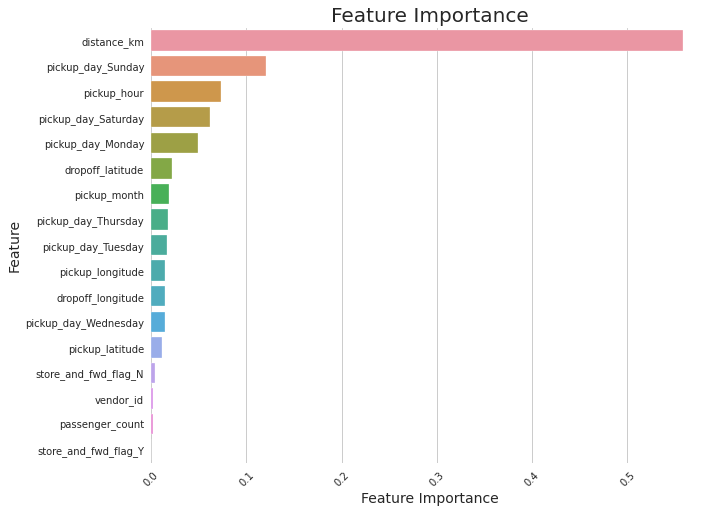

In [ ]:
# Set the figure size and style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# Create a barplot of the 'Feature_importance' column against the 'Feature' column from the 'impt_feat' DataFrame
sns.barplot(y='Feature', x='Feature_importance', data=impt_feat)

# Set the plot title and axis labels
plt.title("Feature Importance", fontsize=20)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Distance appears to be the most significant factor influencing the duration of trips, as evidenced by the graph.

# **Model Evaluation**

An overall evaluation of all models with their respective training, testing, training prediction and testing prediction results is provided.

## **The values of the training data**

In [ ]:
# Define a list of model names and their corresponding training set metrics
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'DecisionTree Regressor', 'XGBoost Regressor']
MSE_train = [mse_train, lassocv_MSE_tr, ridgecv_MSE_tr, dtr_MSE_tr, xgb_MSE_tr]
RMSE_train = [rmse_train, lassocv_RMSE_tr, ridgecv_RMSE_tr, dtr_RMSE_tr, xgb_RMSE_tr]
R2_train = [r2_train, lassocv_R2_tr, ridgecv_R2_tr, dtr_R2_tr, xgb_R2_tr]
Ad_R2_train = [adj_r2_train, lassocv_Ad_R2_tr, ridgecv_Ad_R2_tr, dtr_Ad_R2_tr, xgb_Ad_R2_tr]

## **The values of the testing data**

In [ ]:
# Create a list of model names and lists of their respective test set metrics
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'DecisionTree Regressor', 'XGBoost Regressor']
MSE_test = [mse_test, lassocv_MSE_tst, ridgecv_MSE_tst, dtr_MSE_tst, xgb_MSE_tst]
RMSE_test = [rmse_test, lassocv_RMSE_tst, ridgecv_RMSE_tst, dtr_RMSE_tst, xgb_RMSE_tst]
R2_test = [r2_test, lassocv_R2_tst, ridgecv_R2_tst, dtr_R2_tst, xgb_R2_tst]
Ad_R2_test = [adj_r2_test, lassocv_Ad_R2_tst, ridgecv_Ad_R2_tst, dtr_Ad_R2_tst, xgb_Ad_R2_tst]

In [ ]:
# Create a dataframe with the training set metrics for each model
Train_data_df = pd.DataFrame({
    'Model Name': models,  # A column for the names of each model
    'Train MSE': MSE_train,  # A column for the MSE value of each model on the training set
    'Train RMSE': RMSE_train,  # A column for the RMSE value of each model on the training set
    'Train R^2': R2_train,  # A column for the R-squared value of each model on the training set
    'Train Adjusted R^2': Ad_R2_train  # A column for the adjusted R-squared value of each model on the training set
})
Train_data_df

,Model Name,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
0,Linear Regression,0.012791,0.113097,0.595977,0.595970
1,Lasso Regression,0.012791,0.113099,0.595963,0.595956
2,Ridge Regression,0.012791,0.113097,0.595977,0.595970
3,DecisionTree Regressor,0.008673,0.093132,0.726034,0.726029
4,XGBoost Regressor,0.005282,0.072681,0.833144,0.833142


In [ ]:
# Create a dataframe with the test set metrics for each model
Test_data_df = pd.DataFrame({
    'Model Name': models,  # A column for the names of each model
    'Test MSE': MSE_test,  # A column for the MSE value of each model on the test set
    'Test RMSE': RMSE_test,  # A column for the RMSE value of each model on the test set
    'Test R^2': R2_test,  # A column for the R-squared value of each model on the test set
    'Test Adjusted R^2': Ad_R2_test  # A column for the adjusted R-squared value of each model on the test set
})
Test_data_df

,Model Name,Test MSE,Test RMSE,Test R^2,Test Adjusted R^2
0,Linear Regression,0.012752,0.112926,0.595682,0.595653
1,Lasso Regression,0.012753,0.112927,0.595671,0.595643
2,Ridge Regression,0.012752,0.112926,0.595681,0.595653
3,DecisionTree Regressor,0.008806,0.093841,0.720792,0.720773
4,XGBoost Regressor,0.006079,0.077967,0.807264,0.807250


# **Conclusion**

### **This analysis of NYC taxi trip time prediction using supervised regression methods was a challenging task. With a large dataset, I employed multiple regression models in order to obtain the most accurate prediction. The linear regression, lasso regression, and ridge regression models only slightly improved the R^2 and adjusted R^2 values but the decision tree regressor and XGBoost regressor showed greater performance for both the training and test data sets in terms of MSE, RMSE, R^2, and adjusted R^2 values. Out of the models used, the XGBoost regressor attained the highest performance with 80.72% in the test R^2 value and 83.31% in the train R^2 value.**